In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate


In [17]:
phi_0 = 2.06783384e-15

In [18]:
def process_data(input_file, output_file,nfig = 2):
    with open(input_file, 'r') as file:
        lines = file.readlines()

    lines_with_numbers = [line for line in lines if line.strip().startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]
    modified_lines = [line[8:] for line in lines_with_numbers]
    with open(output_file, 'w') as file:
        file.writelines(modified_lines)

    df = pd.read_csv(output_file, header=None, sep='   ')
   
    x = np.array(df)
   #print(x[1:, 2])

    voltage_source = x[1:, 2]
    #print(voltage_source)
    current = x[1:, 1]
    time = x[1:, 0]
    #print(len(time))
    voltage_node = x[1:, 3]
    if nfig == 2:
        fig, axs = plt.subplots(2, sharex=True)
        fig.suptitle('DC/SFQ Converter Simulated Responses')
        axs[1].set_xlabel('Time (ps)')
        axs[0].plot(time * 1e12, current * 1e6)
        axs[0].set_ylabel(r'Input Current ($\mu$A)')
        #axs[1].set_ylabel(r'V$_Q$ (mV)')
        axs[1].plot(time * 1e12, voltage_node * 1e3)
        axs[1].set_ylabel('Node Voltage (mV)')
        #axs[1].plot(time * 1e12, voltage_source * 1e3)
        #plt.show()
        #print('flux pulse/phi0 ratio: ',scipy.integrate.simpson(voltage_node,time)/2.07e-15 )
        #print(np.max(voltage_node))
    else:
        fig, axs = plt.subplots(3, sharex=True)
        fig.suptitle('DC/SFQ Converter Simulated Responses')
        axs[1].set_xlabel('Time (ps)')
        axs[0].plot(time * 1e12, current * 1e6)
        axs[0].set_ylabel(r'Input Current ($\mu$A)')
        axs[1].set_ylabel(r'V$_Q$ (mV)')
        axs[2].plot(time * 1e12, voltage_node * 1e3)
        axs[2].set_ylabel('Node Voltage (mV)')
        axs[1].plot(time * 1e12, voltage_source * 1e3)
    
    plt.show()
    #print('flux pulse/phi0 ratio: ',scipy.integrate.simpson(voltage_node,time)/2.07e-15 )
    #print(np.max(voltage_node))
       
    #type(voltage_node)
    return time, current, voltage_node, voltage_source

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


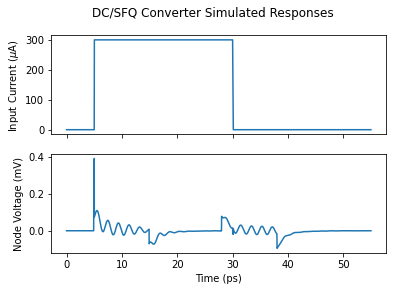

In [19]:
input_file ="C:\\Users\malid\\DC_SFQ_ideal"
output_file ="C:\\Users\\malid\\DC_SFQ_ideal_new"
t,i, vn,vs = process_data(input_file, output_file)

Text(0.5, 1.0, ' "Optimized" Pulse')

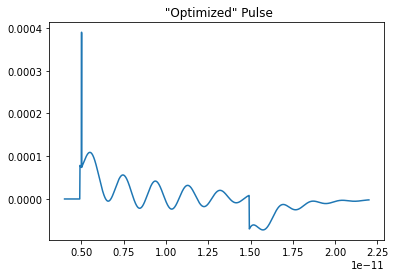

In [20]:
tt = t[4000:22000]
vv = vn[4000:22000]
plt.plot(tt,vv)
plt.title(' "Optimized" Pulse')

In [21]:
scipy.integrate.simpson(vv,tt)/phi_0

0.017299962721388527

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


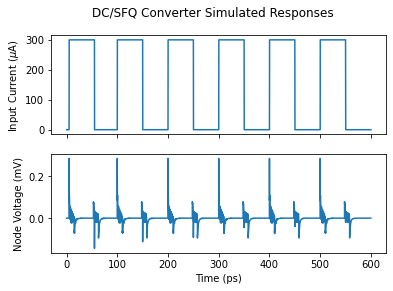

In [22]:
input_file ="C:\\Users\malid\\DC_SFQ_fall_vary"
output_file ="C:\\Users\\malid\\DC_SFQ_fall_vary_new"
tf,ifall, vnf,vsf = process_data(input_file, output_file)

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


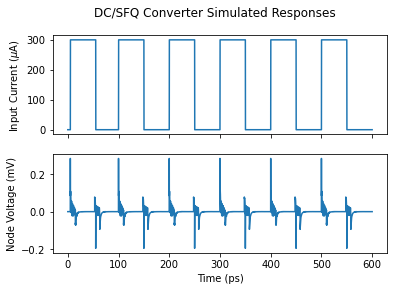

In [23]:
input_file ="C:\\Users\\malid\\DC_SFQ_fall_same"
output_file ="C:\\Users\\malid\\DC_SFQ_fall_same_new"
ts,isame, vns,vss = process_data(input_file, output_file)

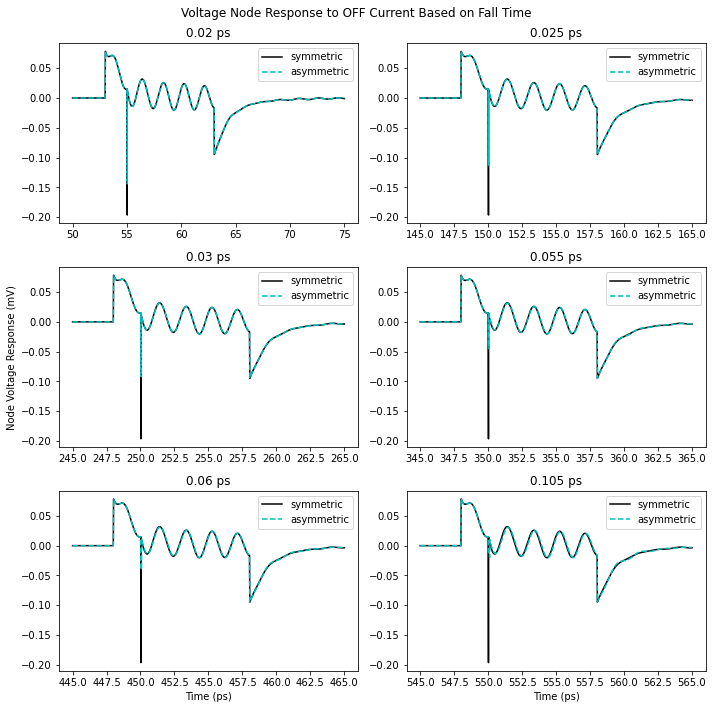

In [24]:
# Fall Response
t1 = tf[50000:75000] ; v1 = vnf[50000:75000]
t2 = tf[145000:165000] ;v2 = vnf[145000:165000]
t3 = tf[245000:265000] ; v3 = vnf[245000:265000]
t4 = tf[345000:365000] ; v4 = vnf[345000:365000]
t5 = tf[445000:465000] ; v5 = vnf[445000:465000]
t6 = tf[545000:565000]; v6 = vnf[545000:565000]

t1s = ts[50000:75000] ; v1s = vns[50000:75000]
t2s = ts[145000:165000] ;v2s = vns[145000:165000]
t3s = ts[245000:265000] ; v3s = vns[245000:265000]
t4s = ts[345000:365000] ; v4s= vns[345000:365000]
t5s = ts[445000:465000] ; v5s = vns[445000:465000]
t6s = ts[545000:565000]; v6s = vns[545000:565000]

fig, axs = plt.subplots(3,2,figsize=(10, 10))

axs[0,0].plot(t1s*1e12,v1s*1e3,c = 'k',label = 'symmetric')
axs[0,1].plot(t2s*1e12,v2s*1e3,c = 'k',label = 'symmetric')
axs[1,0].plot(t3s*1e12,v3s*1e3,c = 'k',label = 'symmetric')
axs[1,1].plot(t4s*1e12,v4s*1e3,c = 'k',label = 'symmetric')
axs[2,0].plot(t5s*1e12,v5s*1e3,c = 'k',label = 'symmetric')
axs[2,1].plot(t6s*1e12,v6s*1e3,c = 'k',label = 'symmetric')
axs[0,0].plot(t1*1e12,v1*1e3,'--',c = 'c',label = 'asymmetric')
axs[0,0].set_title('0.02 ps')
axs[1,0].set_ylabel('Node Voltage Response (mV)')
axs[0,1].plot(t2*1e12,v2*1e3,'--',c = 'c',label = 'asymmetric')
axs[0,1].set_title('0.025 ps')
axs[1,0].plot(t3*1e12,v3*1e3,'--',c = 'c',label = 'asymmetric')
axs[1,0].set_title('0.03 ps')
axs[1,1].plot(t4*1e12,v4*1e3,'--',c = 'c',label = 'asymmetric')
axs[1,1].set_title('0.055 ps')
axs[2,0].plot(t5*1e12,v5*1e3,'--',c = 'c',label = 'asymmetric')
axs[2,0].set_title('0.06 ps')
axs[2,1].plot(t6*1e12,v6*1e3,'--',c = 'c',label = 'asymmetric')
axs[2,1].set_title('0.105 ps')
axs[2,0].set_xlabel('Time (ps)')
axs[2,1].set_xlabel('Time (ps)')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()
fig.suptitle('Voltage Node Response to OFF Current Based on Fall Time')
plt.tight_layout() 
#fig.xlabel('Time (ps)')
#plt.ylabel('Voltage (mV)')

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


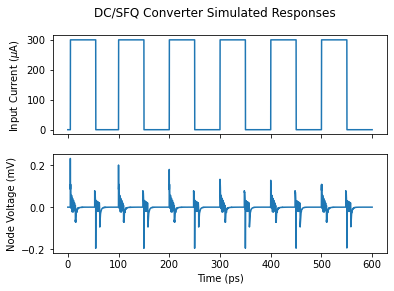

In [25]:
input_file ="C:\\Users\\malid\\DC_SFQ_rise_vary"
output_file ="C:\\Users\\malid\\DC_SFQ_rise_vary_new"
tr,ir, vnr,vsr = process_data(input_file, output_file)

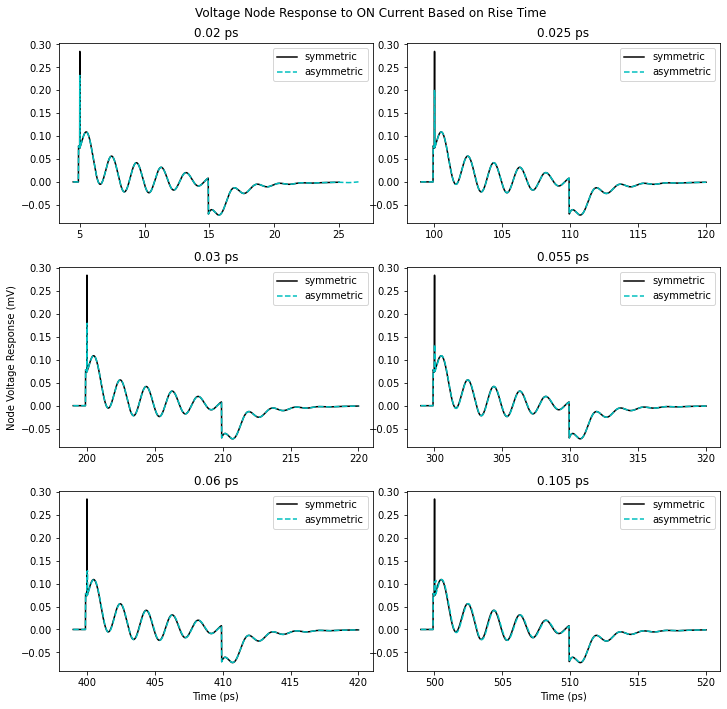

In [26]:
# Rise Response
t1 = tr[4500:26500] ; v1 = vnr[4500:26500]
t2 = tr[99000:120000] ;v2 = vnr[99000:120000]
t3 = tr[199000:220000] ; v3 = vnr[199000:220000]
t4 = tr[299000:320000] ; v4 = vnr[299000:320000]
t5 = tr[399000:420000] ; v5 = vnr[399000:420000]
t6 = tf[499000:520000]; v6 = vnr[499000:520000]

t1s = ts[4500:25000] ; v1s = vns[4500:25000]
t2s = ts[99000:120000] ;v2s = vns[99000:120000]
t3s = ts[199000:220000]; v3s = vns[199000:220000]
t4s = ts[299000:320000]  ; v4s= vns[299000:320000] 
t5s = ts[399000:420000]; v5s = vns[399000:420000]
t6s = ts[499000:520000]; v6s = vns[499000:520000]

fig, axs = plt.subplots(3,2,figsize=(10, 10))

axs[0,0].plot(t1s*1e12,v1s*1e3,c = 'k',label = 'symmetric')
axs[0,1].plot(t2s*1e12,v2s*1e3,c = 'k',label = 'symmetric')
axs[1,0].plot(t3s*1e12,v3s*1e3,c = 'k',label = 'symmetric')
axs[1,1].plot(t4s*1e12,v4s*1e3,c = 'k',label = 'symmetric')
axs[2,0].plot(t5s*1e12,v5s*1e3,c = 'k',label = 'symmetric')
axs[2,1].plot(t6s*1e12,v6s*1e3,c = 'k',label = 'symmetric')
axs[0,0].plot(t1*1e12,v1*1e3,'--',c = 'c',label = 'asymmetric')
axs[0,0].set_title('0.02 ps')
axs[1,0].set_ylabel('Node Voltage Response (mV)')
axs[0,1].plot(t2*1e12,v2*1e3,'--',c = 'c',label = 'asymmetric')
axs[0,1].set_title('0.025 ps')
axs[1,0].plot(t3*1e12,v3*1e3,'--',c = 'c',label = 'asymmetric')
axs[1,0].set_title('0.03 ps')
axs[1,1].plot(t4*1e12,v4*1e3,'--',c = 'c',label = 'asymmetric')
axs[1,1].set_title('0.055 ps')
axs[2,0].plot(t5*1e12,v5*1e3,'--',c = 'c',label = 'asymmetric')
axs[2,0].set_title('0.06 ps')
axs[2,1].plot(t6*1e12,v6*1e3,'--',c = 'c',label = 'asymmetric')
axs[2,1].set_title('0.105 ps')
axs[2,0].set_xlabel('Time (ps)')
axs[2,1].set_xlabel('Time (ps)')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()
fig.suptitle('Voltage Node Response to ON Current Based on Rise Time')
plt.tight_layout() 
#fig.xlabel('Time (ps)')
#plt.ylabel('Voltage (mV)')

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


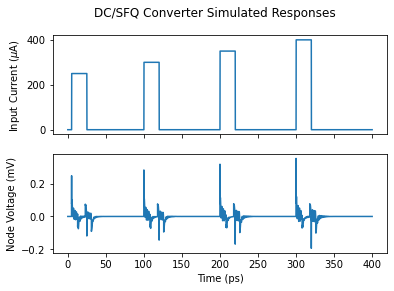

In [27]:
input_file ="C:\\Users\malid\\DC_SFQ_amplitudes"
output_file ="C:\\Users\\malid\\DC_SFQ_time_amplitudes"
t,i, vn,v = process_data(input_file, output_file)

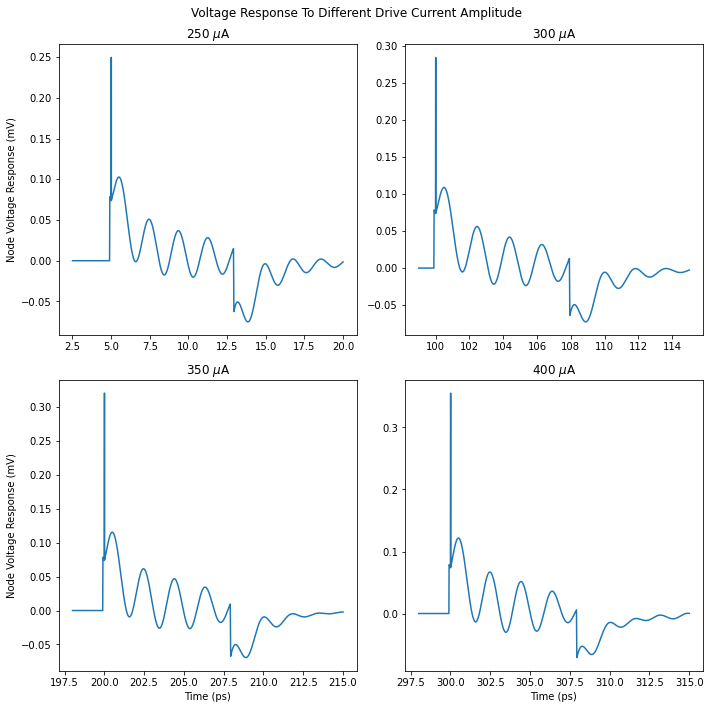

In [28]:
#  Rise Amplitude Response
t1 = t[2500:20000] ; v1 = vn[2500:20000]
t2 = t[99000:115000] ;v2 = vn[99000:115000]
t3 = t[198000:215000] ; v3 = vn[198000:215000]
t4 = t[298000:315000] ; v4 = vn[298000:315000]



fig, axs = plt.subplots(2,2,figsize=(10, 10))
axs[0,0].plot(t1*1e12,v1*1e3)
axs[0,0].set_title(r'250 $\mu$A')
axs[0,1].set_title(r'300 $\mu$A')
axs[1,0].set_title(r'350 $\mu$A')
axs[1,1].set_title(r'400 $\mu$A')
axs[1,0].set_ylabel('Node Voltage Response (mV)')
axs[0,0].set_ylabel('Node Voltage Response (mV)')
axs[0,1].plot(t2*1e12,v2*1e3)
axs[1,0].plot(t3*1e12,v3*1e3)
axs[1,1].plot(t4*1e12,v4*1e3)
axs[1,0].set_xlabel('Time (ps)')
axs[1,1].set_xlabel('Time (ps)')
fig.suptitle('Voltage Response To Different Drive Current Amplitude')
plt.tight_layout() 

In [29]:
phi1= scipy.integrate.simpson(v1,t1)/phi_0
phi2 =scipy.integrate.simpson(v2,t2)/phi_0
phi3 = scipy.integrate.simpson(v3,t3)/phi_0
phi4 = scipy.integrate.simpson(v4,t4)/phi_0
print(phi1,phi2,phi3,phi4)

0.01397788517520196 0.01672759959388743 0.019708891212490726 0.022738390712404785


<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


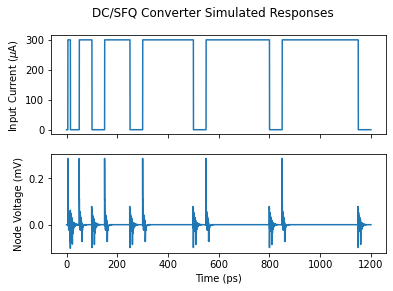

In [30]:

input_file ="C:\\Users\malid\\DC_SFQ_time_vary"
output_file ="C:\\Users\\malid\\DC_SFQ_time_vary_new"
t,i, vn,vs = process_data(input_file, output_file)

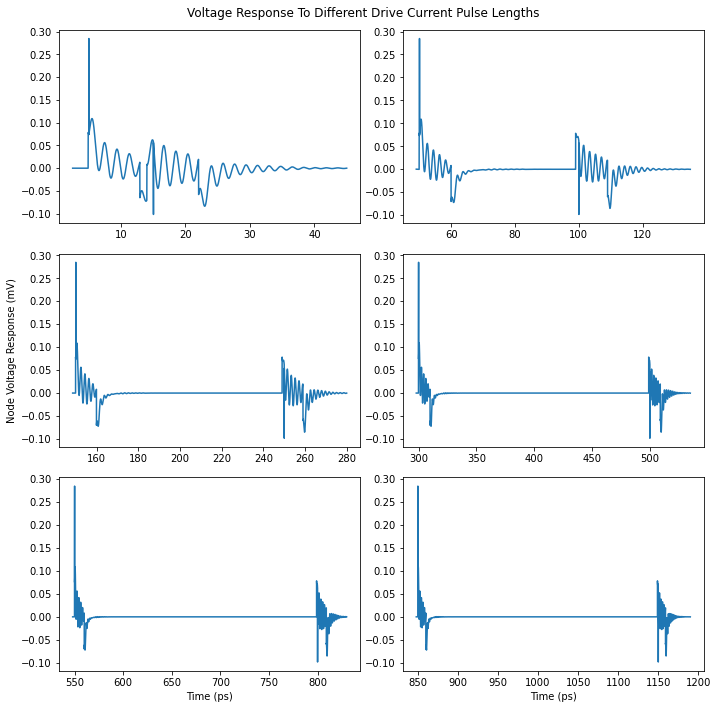

In [31]:
# Rise Response
t1 = t[2500:45000] ; v1 = vn[2500:45000]
t2 = t[49000:135000] ;v2 = vn[49000:135000]
t3 = t[148500:280000] ; v3 = vn[148500:280000]
t4 = t[298000:535000] ; v4 = vn[298000:535000]
t5 = t[548000:830000] ; v5 = vn[548000:830000]
t6 = t[848000:1190000]; v6 = vn[848000:1190000]



fig, axs = plt.subplots(3,2,figsize=(10, 10))
axs[0,0].plot(t1*1e12,v1*1e3)
axs[1,0].set_ylabel('Node Voltage Response (mV)')
axs[0,1].plot(t2*1e12,v2*1e3)
axs[1,0].plot(t3*1e12,v3*1e3)
axs[1,1].plot(t4*1e12,v4*1e3)
axs[2,0].plot(t5*1e12,v5*1e3)
axs[2,1].plot(t6*1e12,v6*1e3)
axs[2,0].set_xlabel('Time (ps)')
axs[2,1].set_xlabel('Time (ps)')
fig.suptitle('Voltage Response To Different Drive Current Pulse Lengths')
plt.tight_layout() 
#fig.xlabel('Time (ps)')
#plt.ylabel('Voltage (mV)')

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


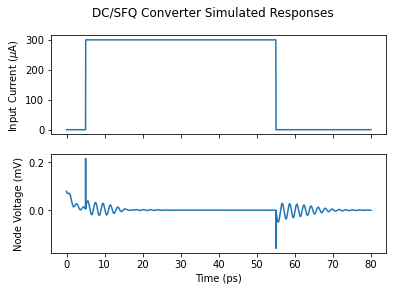

In [32]:
# constant voltage
input_file ="C:\\Users\malid\\DC_SFQ_v_const"
output_file ="C:\\Users\\malid\\DC_SFQ_const_v_new"
t,i, vn,vs = process_data(input_file, output_file)

<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


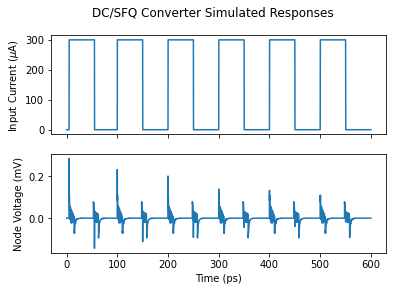

In [33]:
input_file ="C:\\Users\\malid\\DC_SFQ_asym_risefall"
output_file ="C:\\Users\\malid\\DC_SFQ_asym_risefall_new"
ta,ia, vna,vsa =process_data(input_file, output_file)


<ipython-input-18-dad331324e86>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


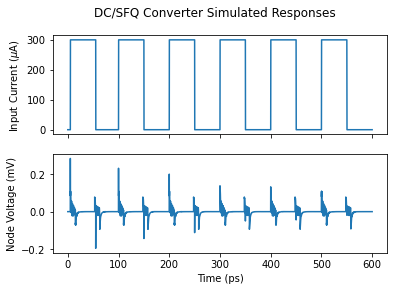

In [34]:
input_file ="C:\\Users\\malid\\DC_SFQ_rise_fall_sym"
output_file ="C:\\Users\\malid\\DC_SFQ_voltage_rise_fall_sym_newz"
ts,i_s, vns,vss =process_data(input_file, output_file)

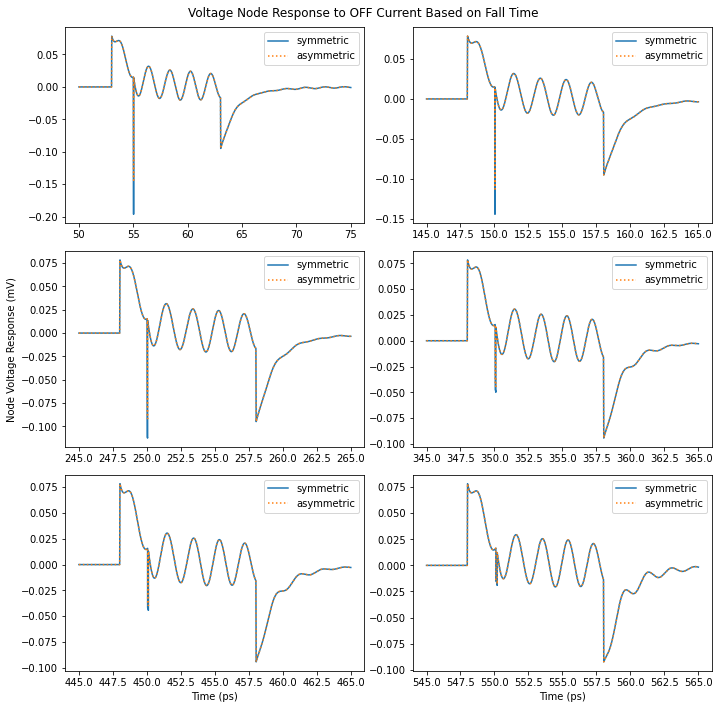

In [35]:
# Fall Response
t1 = ta[50000:75000] ; v1 = vna[50000:75000]
t2 = ta[145000:165000] ;v2 = vna[145000:165000]
t3 = ta[245000:265000] ; v3 = vna[245000:265000]
t4 = ta[345000:365000] ; v4 = vna[345000:365000]
t5 = ta[445000:465000] ; v5 = vna[445000:465000]
t6 = ta[545000:565000]; v6 = vna[545000:565000]

t1s = ts[50000:75000] ; v1s = vns[50000:75000]
t2s = ts[145000:165000] ;v2s = vns[145000:165000]
t3s = ts[245000:265000] ; v3s = vns[245000:265000]
t4s = ts[345000:365000] ; v4s= vns[345000:365000]
t5s = ts[445000:465000] ; v5s = vns[445000:465000]
t6s = ts[545000:565000]; v6s = vns[545000:565000]

fig, axs = plt.subplots(3,2,figsize=(10, 10))

axs[0,0].plot(t1s*1e12,v1s*1e3,label = 'symmetric')
axs[0,1].plot(t2s*1e12,v2s*1e3,label = 'symmetric')
axs[1,0].plot(t3s*1e12,v3s*1e3,label = 'symmetric')
axs[1,1].plot(t4s*1e12,v4s*1e3,label = 'symmetric')
axs[2,0].plot(t5s*1e12,v5s*1e3,label = 'symmetric')
axs[2,1].plot(t6s*1e12,v6s*1e3,label = 'symmetric')
axs[0,0].plot(t1*1e12,v1*1e3,':',label = 'asymmetric')
axs[1,0].set_ylabel('Node Voltage Response (mV)')
axs[0,1].plot(t2*1e12,v2*1e3,':',label = 'asymmetric')
axs[1,0].plot(t3*1e12,v3*1e3,':',label = 'asymmetric')
axs[1,1].plot(t4*1e12,v4*1e3,':',label = 'asymmetric')
axs[2,0].plot(t5*1e12,v5*1e3,':',label = 'asymmetric')
axs[2,1].plot(t6*1e12,v6*1e3,':',label = 'asymmetric')
axs[2,0].set_xlabel('Time (ps)')
axs[2,1].set_xlabel('Time (ps)')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()
fig.suptitle('Voltage Node Response to OFF Current Based on Fall Time')
plt.tight_layout() 
#fig.xlabel('Time (ps)')
#plt.ylabel('Voltage (mV)')

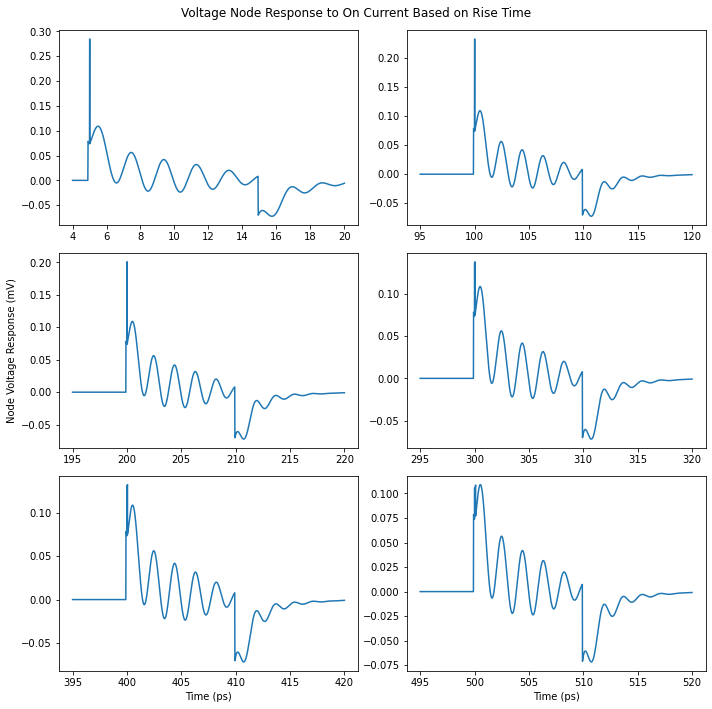

In [36]:
# Rise Response
t1 = ta[4000:20000] ; v1 = vna[4000:20000]
t2 = ta[95000:120000] ;v2 = vna[95000:120000]
t3 = ta[195000:220000] ; v3 = vna[195000:220000]
t4 = ta[295000:320000] ; v4 = vna[295000:320000]
t5 = ta[395000:420000] ; v5 = vna[395000:420000]
t6 = ta[495000:520000]; v6 = vna[495000:520000]



fig, axs = plt.subplots(3,2,figsize=(10, 10))
axs[0,0].plot(t1*1e12,v1*1e3)
axs[1,0].set_ylabel('Node Voltage Response (mV)')
axs[0,1].plot(t2*1e12,v2*1e3)
axs[1,0].plot(t3*1e12,v3*1e3)
axs[1,1].plot(t4*1e12,v4*1e3)
axs[2,0].plot(t5*1e12,v5*1e3)
axs[2,1].plot(t6*1e12,v6*1e3)
axs[2,0].set_xlabel('Time (ps)')
axs[2,1].set_xlabel('Time (ps)')
fig.suptitle('Voltage Node Response to On Current Based on Rise Time')
plt.tight_layout() 
#fig.xlabel('Time (ps)')
#plt.ylabel('Voltage (mV)')

Text(0, 0.5, 'Voltage (mV)')

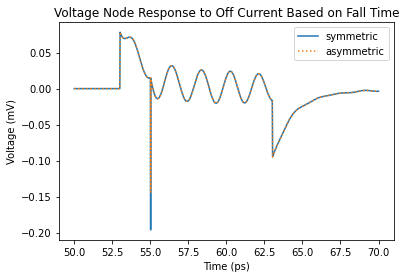

In [37]:
ts_plt = ts[50000:70000]
vs_plt = vns[50000:70000]
ta_plt=ta[50000:70000]
va_plt=vna[50000:70000]
plt.plot(ts_plt*1e12,vs_plt*1e3,label ='symmetric')
plt.plot(ta_plt*1e12,va_plt*1e3,':',label='asymmetric')
plt.legend()
plt.title('Voltage Node Response to Off Current Based on Fall Time')
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (mV)')

In [38]:
#def process_data(input_file, output_file):
with open(input_file, 'r') as file:
    lines = file.readlines()

lines_with_numbers = [line for line in lines if line.strip().startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]
modified_lines = [line[8:] for line in lines_with_numbers]
with open(output_file, 'w') as file:
    file.writelines(modified_lines)

df = pd.read_csv(output_file, header=None, sep='   ')
   
x = np.array(df)
   #print(x[1:, 2])


<ipython-input-38-f9d6d9e998a9>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(output_file, header=None, sep='   ')


In [39]:
voltage_source = x[1:, 2]
    #print(voltage_source)
current = x[1:, 1]
time = x[1:, 0]
    #print(len(time))
voltage_node = x[1:, 3]
  

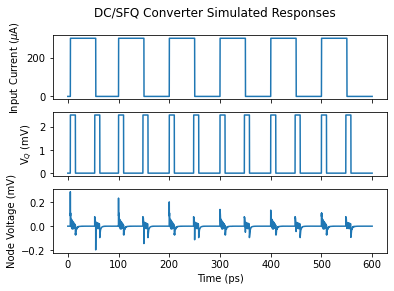

In [40]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('DC/SFQ Converter Simulated Responses')
axs[2].set_xlabel('Time (ps)')
axs[0].plot(time * 1e12, current * 1e6)
axs[0].set_ylabel(r'Input Current ($\mu$A)')
axs[1].set_ylabel(r'V$_Q$ (mV)')
axs[2].plot(time * 1e12, voltage_node * 1e3)
axs[2].set_ylabel('Node Voltage (mV)')
axs[1].plot(time * 1e12, voltage_source * 1e3)
plt.show()

In [41]:
sfq_time = time[50000:90000]
sfq_volt = voltage_node[50000:90000]
sfq_time3 = time[335000:375000]
sfq_volt3 = voltage_node[335000:375000]
sfq_time1 = time[148000:180000]
sfq_volt1 = voltage_node[148000:180000]
sfq_time2 = time[245000:275000]
sfq_volt2 = voltage_node[245000:275000]
sfq_time4 = time[440000:480000]
sfq_volt4 = voltage_node[440000:480000]

Text(0.5, 0.98, 'Node Voltage Response to Drive Current Off')

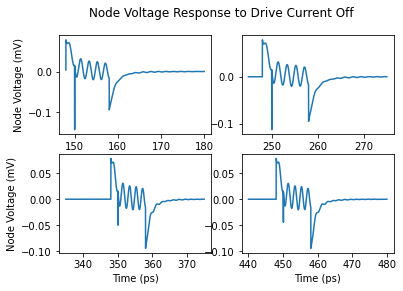

In [42]:
fig, axs=plt.subplots(2,2)
axs[0,0].plot(sfq_time1*1e12,sfq_volt1*1e3)
axs[0,0].set_xlabel("Time (ps)")
axs[1,0].set_xlabel("Time (ps)")
axs[0,1].set_xlabel("Time (ps)")
axs[1,1].set_xlabel("Time (ps)")
axs[0,0].set_ylabel("Node Voltage (mV)")
axs[1,0].set_ylabel("Node Voltage (mV)")
axs[0,1].plot(sfq_time2*1e12,sfq_volt2*1e3)
axs[1,0].plot(sfq_time3*1e12,sfq_volt3*1e3)
axs[1,1].plot(sfq_time4*1e12,sfq_volt4*1e3)
fig.suptitle('Node Voltage Response to Drive Current Off')
